In [1]:
import CONST
import numpy as np
import cv2
import os
import time
from imutils import paths
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import img_to_array
from keras.utils import to_categorical
from keras import applications
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
import matplotlib.pyplot as plt
from PIL import Image
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import pandas as pd

Using TensorFlow backend.
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarn

In [2]:
# PREPROCESSING DATASET -----------------
print("[INFO] loading dataset...")

#grab the paths to our input images followed by shuffling them 
imagePaths = sorted(list(paths.list_images('dataset')))

[INFO] loading dataset...


In [3]:
lookup = dict()
reverselookup = dict()
count = 0
for j in os.listdir('dataset'):
    if not j.startswith('.'): # If running this code locally, this is to 
        print(j)                      # ensure you aren't reading in hidden folders
        lookup[j] = count
        reverselookup[count] = j
        count = count + 1
lookup

Nacho
Hand_1
Hand_2


{'Nacho': 0, 'Hand_1': 1, 'Hand_2': 2}

In [4]:
data = []
labels = []
lookup = {}
for imagePath in imagePaths:
    # load the image, pre-process it, resize it to IMAGE_SIZE, store it in the data list
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (CONST.IMAGE_SIZE, CONST.IMAGE_SIZE))
    image = img_to_array(image)
    data.append(image)
    label = imagePath.split(os.path.sep)[-2]
    folders = []
    for folder in os.listdir('dataset'):
        if not folder.startswith('.'):
            folders.append(folder)
    for i in range(len(folders)):
        if label == folders[i]:
            label = i
            labels.append(label)
            if folders[i] not in lookup.keys():
                lookup[i]= folders[i]
            else:
                pass
                
print(labels)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [5]:
# scaling the data points from [0, 255] to the range [0, 1]
data = np.array(data, dtype="float32") / 255.0
labels = np.array(labels)


In [6]:
from sklearn.model_selection import train_test_split
x_train,x_further,y_train,y_further = train_test_split(data,labels,test_size = 0.1)
x_validate,x_test,y_validate,y_test = train_test_split(x_further,y_further,test_size = 0.5)

Hand_1


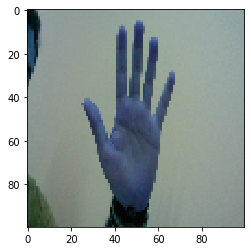

In [7]:
plt.imshow(x_train[0])
print(lookup[(y_train[0])])

In [8]:
# convert the labels from integers to vectors
NUM_CLASSES = len(folders)

y_train = to_categorical(y_train).astype(int)
y_test = to_categorical(y_test).astype(int)
y_validate = to_categorical(y_validate).astype(int)

In [9]:
from keras import layers
from keras import models

In [10]:
model=models.Sequential()
model.add(layers.Conv2D(32, (5, 5), strides=(2, 2), activation='relu', input_shape=(100, 100,3))) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64 , (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, batch_size=1, verbose=1, validation_data=(x_validate, y_validate))

Instructions for updating:
Use tf.cast instead.
Train on 135 samples, validate on 7 samples
Epoch 1/10
135/135 [==============================] - 1s 10ms/step - loss: 0.3280 - accuracy: 0.8741 - val_loss: 3.5789e-05 - val_accuracy: 1.0000
Epoch 2/10
135/135 [==============================] - 1s 9ms/step - loss: 0.3470 - accuracy: 0.9778 - val_loss: 4.6832e-06 - val_accuracy: 1.0000
Epoch 3/10
135/135 [==============================] - 1s 8ms/step - loss: 1.9890e-06 - accuracy: 1.0000 - val_loss: 1.1921e-07 - val_accuracy: 1.0000
Epoch 4/10
135/135 [==============================] - 1s 9ms/step - loss: 1.6159e-07 - accuracy: 1.0000 - val_loss: 1.1921e-07 - val_accuracy: 1.0000
Epoch 5/10
135/135 [==============================] - 1s 9ms/step - loss: 0.0761 - accuracy: 0.9926 - val_loss: 4.2660e-06 - val_accuracy: 1.0000
Epoch 6/10
135/135 [==============================] - 1s 10ms/step - loss: 1.0239e-06 - accuracy: 1.0000 - val_loss: 1.1921e-07 - val_accuracy: 1.0000
Epoch 7/10
135/135

In [12]:
[loss, acc] = model.evaluate(x_test,y_test,verbose=1)
print("Accuracy:" + str(acc))

8/8 [==============================] - 0s 3ms/step
Accuracy:1.0


Hand_1


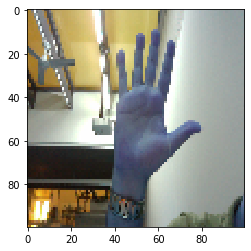

In [23]:
image = cv2.imread('test_data/3.jpg'.format(i))
image = cv2.resize(image, (CONST.IMAGE_SIZE, CONST.IMAGE_SIZE))
image_2 = [img_to_array(image)]
lerdo = np.array(image_2, dtype="float32") / 255.0
x = model.predict_classes(lerdo)
x = int(x)
print(lookup[x])
plt.imshow(lerdo[0])